<a href="https://colab.research.google.com/github/NgdHung31/Real_Estate_Regession_Deep_Learning/blob/main/Kaggle_KerassRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hose Sales Prediction (Keras-Regression vs Multiple Regression)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Data used: https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    !pip install gdown

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install tensorflow -U
!gdown https://drive.google.com/uc?id=1H98Xv24pGw9jTQO5sJsp6X8xRPfrxiHG

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.
Downloading...
From: https://drive.google.com/uc?id=1H98Xv24pGw9jTQO5sJsp6X8xRPfrxiHG
To: /content/dataset_non_outliers_Price_Area.csv
100% 9.23M/9.23M [00:00<00:00, 50.2MB/s]


In [ ]:
# read the csv file
Data = pd.read_csv('/content/dataset_non_outliers_Price_Area.csv')

<ipython-input-3-f63052ca2597>:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('/content/dataset_non_outliers_Price_Area.csv')


# Exploratory Data Analysis

In [ ]:
Data.head(5)

,Property_type,Area,Width,Length,Frontage,Number_of_floors,Number_of_bedrooms,Number_of_toilets,Legal_status,Furniture,...,Posting_date,Expiry_date,Type_of_listing,Project_name,Street,Ward,District,Province,Distance,Price
0,Nhà biệt thự,80.0,NaN,NaN,NaN,3.0,4.0,3,Đã có sổ,Có nội thất,...,1/11/2023,16/11/2023,Tin thường,Dự án Lovera Park,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,6.5
1,Nhà biệt thự,80.0,NaN,NaN,6.0,3.0,3.0,3,Đã có sổ,Có nội thất,...,31/10/2023,7/11/2023,Tin VIP Bạc,Dự án Khang Điền Bình Chánh,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,7.9
2,Nhà biệt thự,136.5,NaN,NaN,7.0,3.0,4.0,4,Đã có sổ,Có nội thất,...,30/10/2023,14/11/2023,Tin VIP Bạc,Dự án KDC Phong Phú 5,Đường Số 5,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,10.8
3,Nhà biệt thự,95.0,NaN,NaN,NaN,5.0,5.0,4,Đã có sổ,Không có nội thất,...,20/10/2023,4/11/2023,Tin thường,Unknown,Đường Quách Điêu,Xã Vĩnh Lộc A,Bình Chánh,TP Hồ Chí Minh,14.245030,7.6
4,Nhà biệt thự,90.0,NaN,NaN,NaN,5.0,5.0,4,Đã có sổ,Không có nội thất,...,30/10/2023,14/11/2023,Tin thường,Unknown,Đường Quách Điêu,Xã Vĩnh Lộc A,Bình Chánh,TP Hồ Chí Minh,14.245030,7.6


In [ ]:
#get some information about our DataSet
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47637 entries, 0 to 47636
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        47637 non-null  object 
 1   Area                 47637 non-null  float64
 2   Width                3205 non-null   float64
 3   Length               1648 non-null   float64
 4   Frontage             8695 non-null   float64
 5   Number_of_floors     20686 non-null  float64
 6   Number_of_bedrooms   41687 non-null  float64
 7   Number_of_toilets    36947 non-null  object 
 8   Legal_status         47637 non-null  object 
 9   Furniture            47637 non-null  object 
 10  House_orientation    11611 non-null  object 
 11  Balcony_orientation  6539 non-null   object 
 12  Access_road          8451 non-null   float64
 13  Posting_date         47637 non-null  object 
 14  Expiry_date          26859 non-null  object 
 15  Type_of_listing      26898 non-null 

,count,mean,std,min,25%,50%,75%,max
Area,47637.0,74.756512,28.897334,7.000000,55.000000,70.000000,90.000000,161.000000
Width,3205.0,4.931357,7.158506,2.000000,4.000000,4.000000,5.000000,350.000000
Length,1648.0,15.070631,9.356820,1.000000,11.000000,14.000000,18.000000,222.500000
Frontage,8695.0,5.570094,12.226474,1.000000,4.000000,4.800000,6.000000,980.000000
Number_of_floors,20686.0,3.145702,1.314078,1.000000,2.000000,3.000000,4.000000,9.000000
Number_of_bedrooms,41687.0,3.038117,2.118783,1.000000,2.000000,2.000000,4.000000,57.000000
Access_road,8451.0,10.108733,9.184272,1.050000,5.000000,8.000000,12.000000,322.000000
Distance,47637.0,7.362353,3.917916,0.449674,4.274879,6.949138,9.636417,49.613941
Price,47637.0,7.174582,6.590799,0.010000,2.600000,4.700000,9.000000,33.000000


In [ ]:
#let's drop unnecessory featurs
#Data = Data.drop('id',axis=1)
#Data = Data.drop('zipcode',axis=1)

In [ ]:
# check if there are any Null values
Data.isnull().sum()

Property_type              0
Area                       0
Width                  44432
Length                 45989
Frontage               38942
Number_of_floors       26951
Number_of_bedrooms      5950
Number_of_toilets      10690
Legal_status               0
Furniture                  0
House_orientation      36026
Balcony_orientation    41098
Access_road            39186
Posting_date               0
Expiry_date            20778
Type_of_listing        20739
Project_name           25214
Street                  1461
Ward                       0
District                   0
Province                   0
Distance                   0
Price                      0
dtype: int64

<ipython-input-8-acb382aa1f3f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Price'])


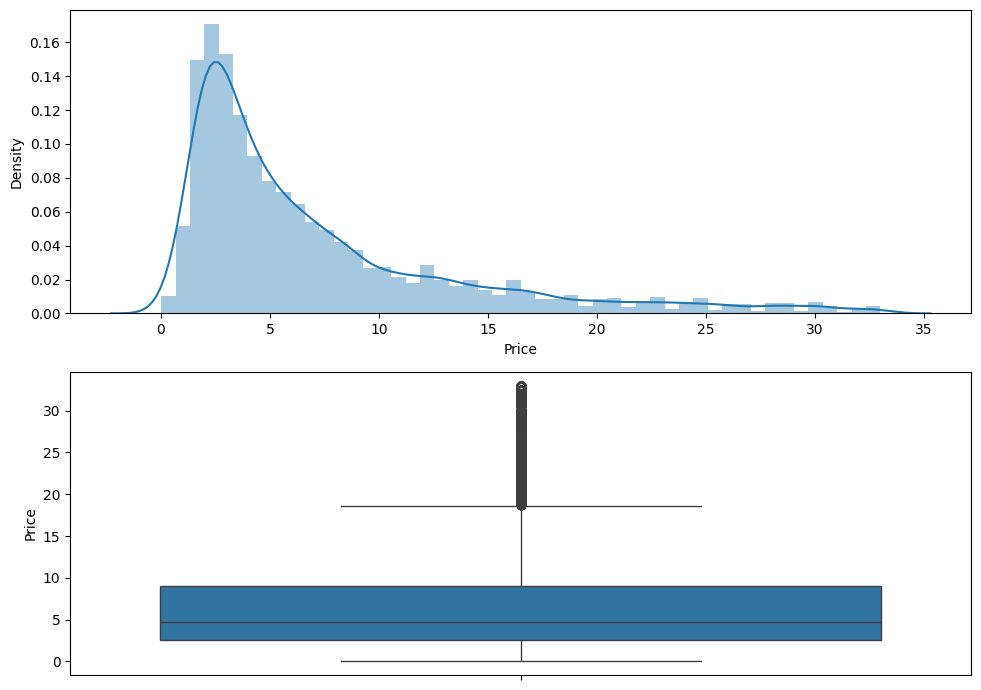

In [ ]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['Price'])
plt.tight_layout()

In [ ]:
Data = Data.drop(labels=['Frontage','Street', 'Ward', 'Province', 'Width', 'Length', 'House_orientation', 'Balcony_orientation', 'Access_road', 'Posting_date', 'Expiry_date', 'Type_of_listing'], axis=1)

In [ ]:
Data.loc[Data["Property_type"] == "Chung cư", "Number_of_floors"] = 1
Data.loc[pd.isnull(Data["Project_name"]), "Project_name"] = "Other"

In [ ]:
Data.isnull().sum()

Property_type             0
Area                      0
Frontage              38942
Number_of_floors       7146
Number_of_bedrooms     5950
Number_of_toilets     10690
Legal_status              0
Furniture                 0
Project_name              0
Street                 1461
Ward                      0
District                  0
Province                  0
Distance                  0
Price                     0
dtype: int64

KeyError: 'bedrooms'

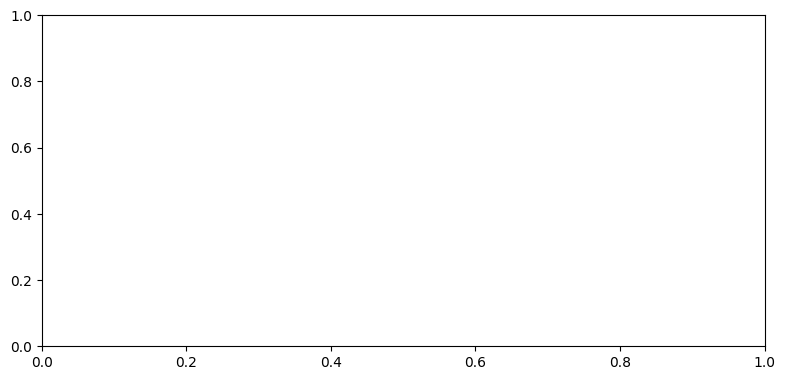

In [ ]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()


In [ ]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

In [ ]:
# check correlation
Data.corr()['price'].sort_values(ascending=False)

In [ ]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=Data)

In [ ]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bedrooms',y = 'price', data = Data)

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=Data,hue='price')

In [ ]:
#let's clean it the map a bit - we are taking 99% bottom price houses
non_top_1_perc = Data.sort_values('price',ascending = False).iloc[216:]


In [ ]:
len(Data)*0.01

In [ ]:
# let's try this one again
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,alpha = 0.8,palette = 'RdYlGn', hue='price')


In [ ]:
#visualizing data
#sns.pairplot(Data['bedrooms bathrooms sqft_living floors waterfront price'.split()])

In [ ]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
Data.head(5)

In [ ]:
# data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [ ]:
Data = Data.drop('date',axis=1)

# Scaling and Train Test Split


In [ ]:
X = Data.drop('Price',axis =1).values
y = Data['Price'].values

#splitting Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Feature Scalling

In [ ]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Method1: Multiple Linear Regression

In [ ]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

In [ ]:
#coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient'])
#coeff_df

In [ ]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd)))
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

In [ ]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

In [ ]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

# Method2: Keras Regression

In [ ]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# having 19 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

In [ ]:
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))


# Evaluation on Test Data

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

In [ ]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

In [ ]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

# Hoe we can use the model!

In [ ]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = Data.drop('price',axis = 1).iloc[0]

In [ ]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
# apply model on those featurs
model.predict(single_house)

In [ ]:
# compare the prediction with real price for the first column
Data['price'][0]

# Multiple Linear Regression vs Keras Regression

In [ ]:

print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd)))
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

### Lightning

In [ ]:
!pip install lightning -U
import torch as th
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl
from collections import OrderedDict

class PlDNNModule(pl.LightningModule):
    def __init__(self, hparams):
        super(PlDNNModule, self).__init__()
        self.hparams = hparams
        self.layers = nn.Sequential(OrderedDict(self.get_fclayer_list([8, 512, 256, 128, 64, 32, 16])))

    # creates a list of hidden layers with given number of neuron in each layer and connects it to the output layer.
    # Relu is used as the activation funtion. No activation function is applied for the last layer output
    def get_fclayer_list(self, hidden_layers, outputs=1):
        input_layers, output_layers = hidden_layers[:-1], hidden_layers[1:]
        layers = []
        for i, (l1, l2) in enumerate(zip(input_layers, output_layers)):
            layers.append((f'fc{i}', nn.Linear(l1, l2)))
            layers.append((f'relu{i}', nn.ReLU()))
        layers.append(('fc_out', nn.Linear(output_layers[-1], outputs)))
        return layers

    def forward(self, x):
        x = self.layers(x)
        return x

    # def configure_optimizers(self):
    #    return optim.Adam(self.parameters(), lr=self.hparams.learning_rate)

    def configure_optimizers(self):
        optimizer = th.optim.Adam(self.parameters(), lr=self.hparams.learning_rate)
        scheduler = th.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=2, min_lr=1e-7, verbose=True)
        return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "val_loss"}

    def shared_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = F.l1_loss(logits, y)
        return loss, logits

    def training_step(self, batch, batch_idx):
        loss, _ = self.shared_step(batch, batch_idx)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, _ = self.shared_step(batch, batch_idx)
        self.log('val_loss', loss)
        return {'val_loss', loss}

    def validation_epoch_end(self, outputs):
        avg_val_loss = th.stack([list(x)[0] for x in outputs]).mean()
        self.log('avg_val_loss', avg_val_loss)


In [ ]:
from pathlib import Path
import torch as th
import pytorch_lightning as pl
import pandas as pd
#from sklearn import preprocessing
from torch.utils.data import TensorDataset, DataLoader, random_split

class PlDataModule(pl.LightningDataModule):
    def __init__(self, hparams):
        super(PlDataModule, self).__init__()
        self.hparams = hparams
        self.train_dataset = None
        self.valid_dataset = None

    def load_data(self):
        input_file = Path(self.hparams.data_folder).joinpath(self.hparams.train_input).as_posix()
        df = pd.read_csv(input_file)
        # commented code for normalization options. minmax or mean-std approach
        #min_max_scaler = preprocessing.MinMaxScaler()
        #scaled_input = min_max_scaler.fit_transform(df.values)
        #normalized_df = (df-df.mean())/df.std()
        df = pd.DataFrame(df.values)
        x = df.loc[:, :9].values
        y = df.loc[:, 10:].values
        return x, y

    def setup(self, stage=None):
        x, y = self.load_data()
        dataset = TensorDataset(
            th.tensor(x, dtype=th.float), th.tensor(y, dtype=th.float))
        train_size = int(0.90 * len(dataset))
        val_size = int(0.1 * len(dataset))
        self.train_dataset, self.valid_dataset = random_split(dataset, (train_size, val_size))

    def train_dataloader(self):
        dataloader = DataLoader(self.train_dataset,
                                batch_size=self.hparams.batch_size,
                                shuffle=True,
                                num_workers=self.hparams.num_workers,
                                pin_memory=True,
                                drop_last=True)
        return dataloader

    def val_dataloader(self):
        dataloader = DataLoader(self.valid_dataset,
                                batch_size=self.hparams.batch_size,
                                num_workers=self.hparams.num_workers,
                                pin_memory=True,
                                drop_last=True)
        return dataloader

In [ ]:
from pathlib import Path
import torch as th
import pandas as pd

# All of this can be moved to the test loop of pytorch lightning itself
# Decided to make the inference separate from the training loops


class ResultWriter():
    def __init__(self, trained_model, hparams):
        self.model = trained_model
        self.hparams = hparams

    def load_data(self):
        input_file = Path(self.hparams.data_folder).joinpath(self.hparams.test_input).as_posix()
        df = pd.read_csv(input_file)
        x = df.values
        return x

    def test_model(self):
        test_data = self.load_data()
        output = []

        for line in test_data:
            x = th.tensor(line[:10], dtype=th.float)
            y = self.model(x.view(-1, 10))
            output.append(y.item())

        self.save_output(test_data, output)

    def save_output(self, input, output):
        output_file = Path(self.hparams.data_folder).joinpath(self.hparams.test_output).as_posix()

        df = pd.DataFrame(input)
        df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
        df['Y'] = output

        df.to_csv(output_file, index=False)

ERROR: Could not find a version that satisfies the requirement data_module (from versions: none)
ERROR: No matching distribution found for data_module


In [ ]:
from argparse import Namespace
import torch
from pytorch_lightning import seed_everything
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# Define hparams
hparams = Namespace(
    checkpoint_name='./checkpoint/final.ckpt',
    data_folder='./content',
    train_input='dataset_non_outliers_Price_Area.csv',
    test_input='test.csv',
    test_output='test_pred.csv',
    default_root_dir='./logs',
    max_epochs=450,
    gpus=(-1 if torch.cuda.is_available() else 0),
    auto_select_gpus=True,
    deterministic=True,
    batch_size=512,
    num_workers=6,
    learning_rate=0.02,
    fast_dev_run=False
)

early_stop_callback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=True, mode='min')

def train_model(hparams):

    seed_everything(77)

    ml_module = PlDNNModule(hparams=hparams)
    data_module = PlDataModule(hparams=hparams)

    #model_trainer = pl.Trainer.from_argparse_args(hparams)
    model_trainer = pl.Trainer.from_argparse_args(hparams, callbacks=[early_stop_callback])

    model_trainer.logger = pl.loggers.TensorBoardLogger('logs/', name='exp')

    model_trainer.fit(ml_module, data_module)
    model_trainer.save_checkpoint(hparams.checkpoint_name)


def test_model(hparams):
    model = PlDNNModule.load_from_checkpoint(hparams.checkpoint_name)
    output_writer = ResultWriter(model, hparams=hparams)
    output_writer.test_model()

# Call train_model() with hparams
train_model(hparams=hparams)
test_model(hparams=hparams)

python3: can't open file '/content/train.py': [Errno 2] No such file or directory
